In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('comparisons.csv')

In [61]:
# Prepare the data
# Convert numbers to scientific notation
data['as'] = data['as'].apply(lambda x: '{:.2e}'.format(x))
#data['as_2'] = data['as'].apply(lambda x: float(x.split('e')[1]))
data['as'] = data['as'].apply(lambda x: float(x))

# At diff_2, zeros should look like having a negative exponent


# Convert numbers to scientific notation
data['r'] = data['r'].apply(lambda x: '{:.2e}'.format(x))
data['r'] = data['r'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['stan'] = data['stan'].apply(lambda x: '{:.2e}'.format(x))
data['stan'] = data['stan'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['err'] = data['err'].apply(lambda x: '{:.2e}'.format(x))
data['err'] = data['err'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['R-STAN'] = data['R-STAN'].apply(lambda x: '{:.2e}'.format(x))
data['R-STAN'] = data['R-STAN'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['R-AS'] = data['R-AS'].apply(lambda x: '{:.2e}'.format(x))
data['R-AS'] = data['R-AS'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['STAN-AS'] = data['STAN-AS'].apply(lambda x: '{:.2e}'.format(x))
data['STAN-AS'] = data['STAN-AS'].apply(lambda x: float(x))

# Obter os valores únicos de gamma
unique_gamma = data['gamma'].unique()

print(data.head())


   alfa  beta   gamma  t0  t1     as     r  stan           err        R-STAN  \
0 -10.0 -10.0   0.100   0   1   1.79  50.9  50.9  5.680000e-14  7.110000e-15   
1 -10.0 -10.0   2.575   0   1 -11.50  48.4  48.4  5.380000e-14  1.420000e-14   
2 -10.0 -10.0   5.050   0   1 -20.00  46.0  46.0  5.100000e-14  0.000000e+00   
3 -10.0 -10.0   7.525   0   1 -27.10  43.5  43.5  4.830000e-14  7.110000e-15   
4 -10.0 -10.0  10.000   0   1 -33.20  41.0  41.0  4.550000e-14 -7.110000e-15   

   R-AS  STAN-AS  
0  49.1     49.1  
1  59.9     59.9  
2  66.0     66.0  
3  70.5     70.5  
4  74.2     74.2  


In [62]:
#na coluna as, o valor deve ser NAN se alfa*beta for positivo

data['as'][data['alfa']*data['beta'] > 0] = np.nan

/tmp/ipykernel_9100/2587112671.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['as'][data['alfa']*data['beta'] > 0] = np.nan
/tmp/ipykernel_9100/2587112671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

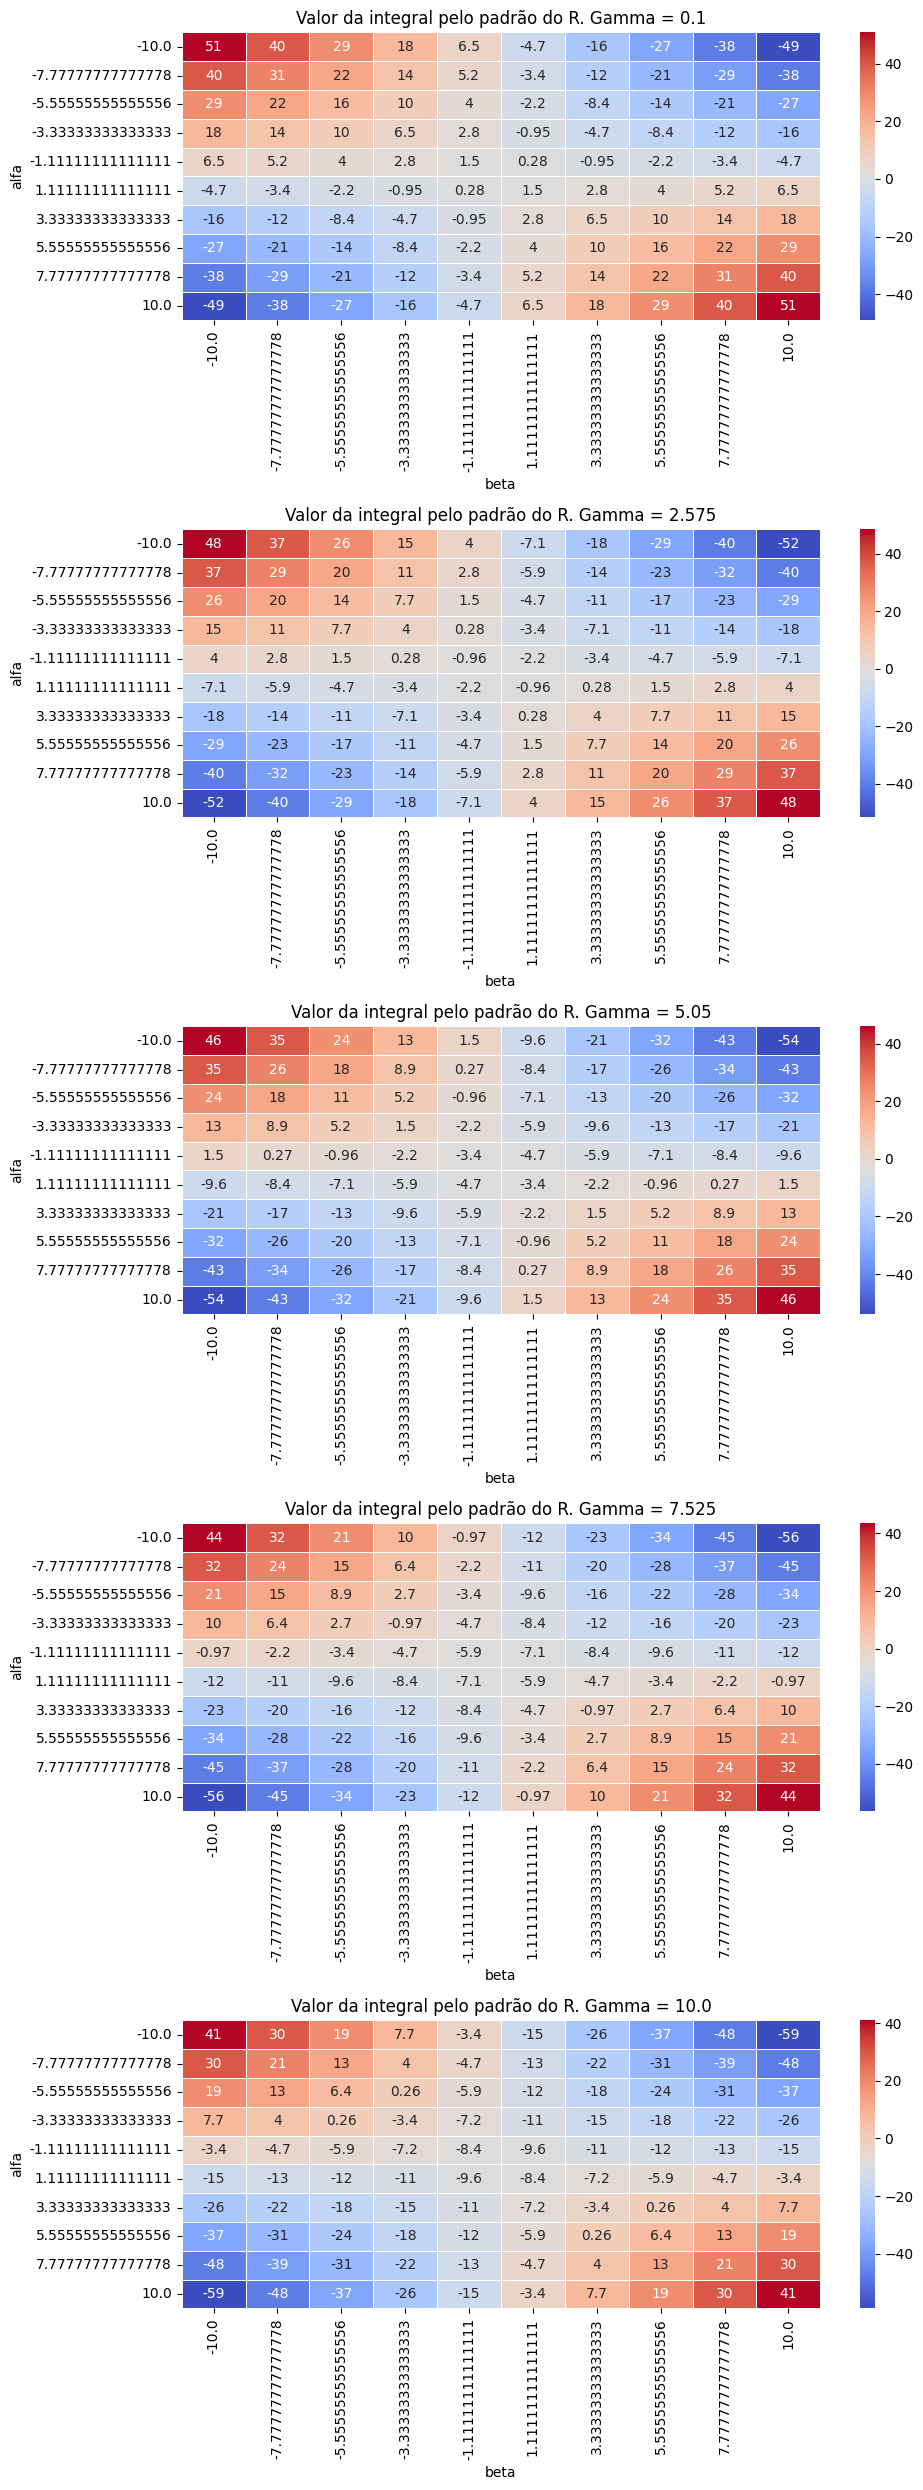

In [63]:
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='r')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Valor da integral pelo padrão do R. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('r.png')

# Display the plot
plt.show()

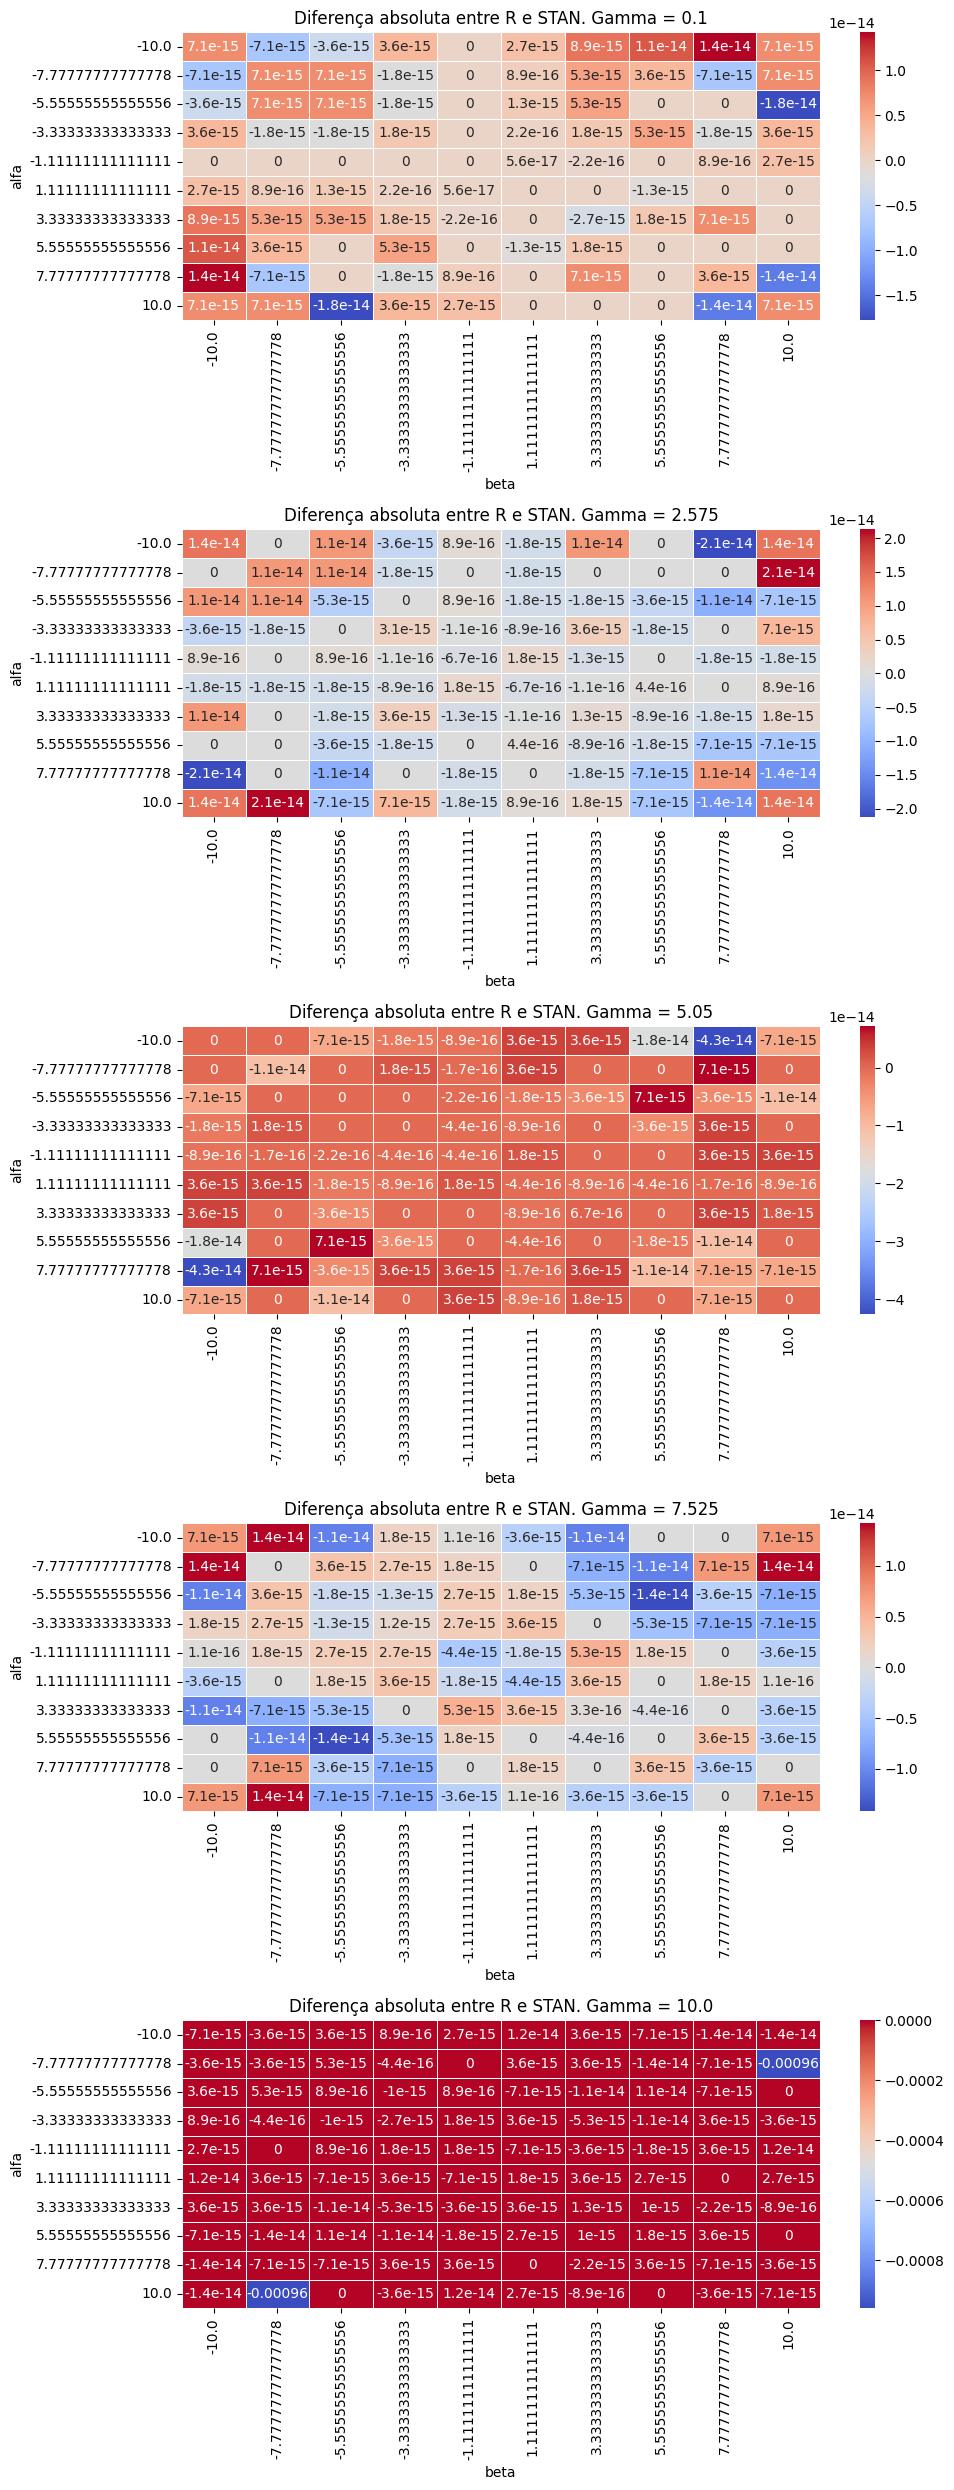

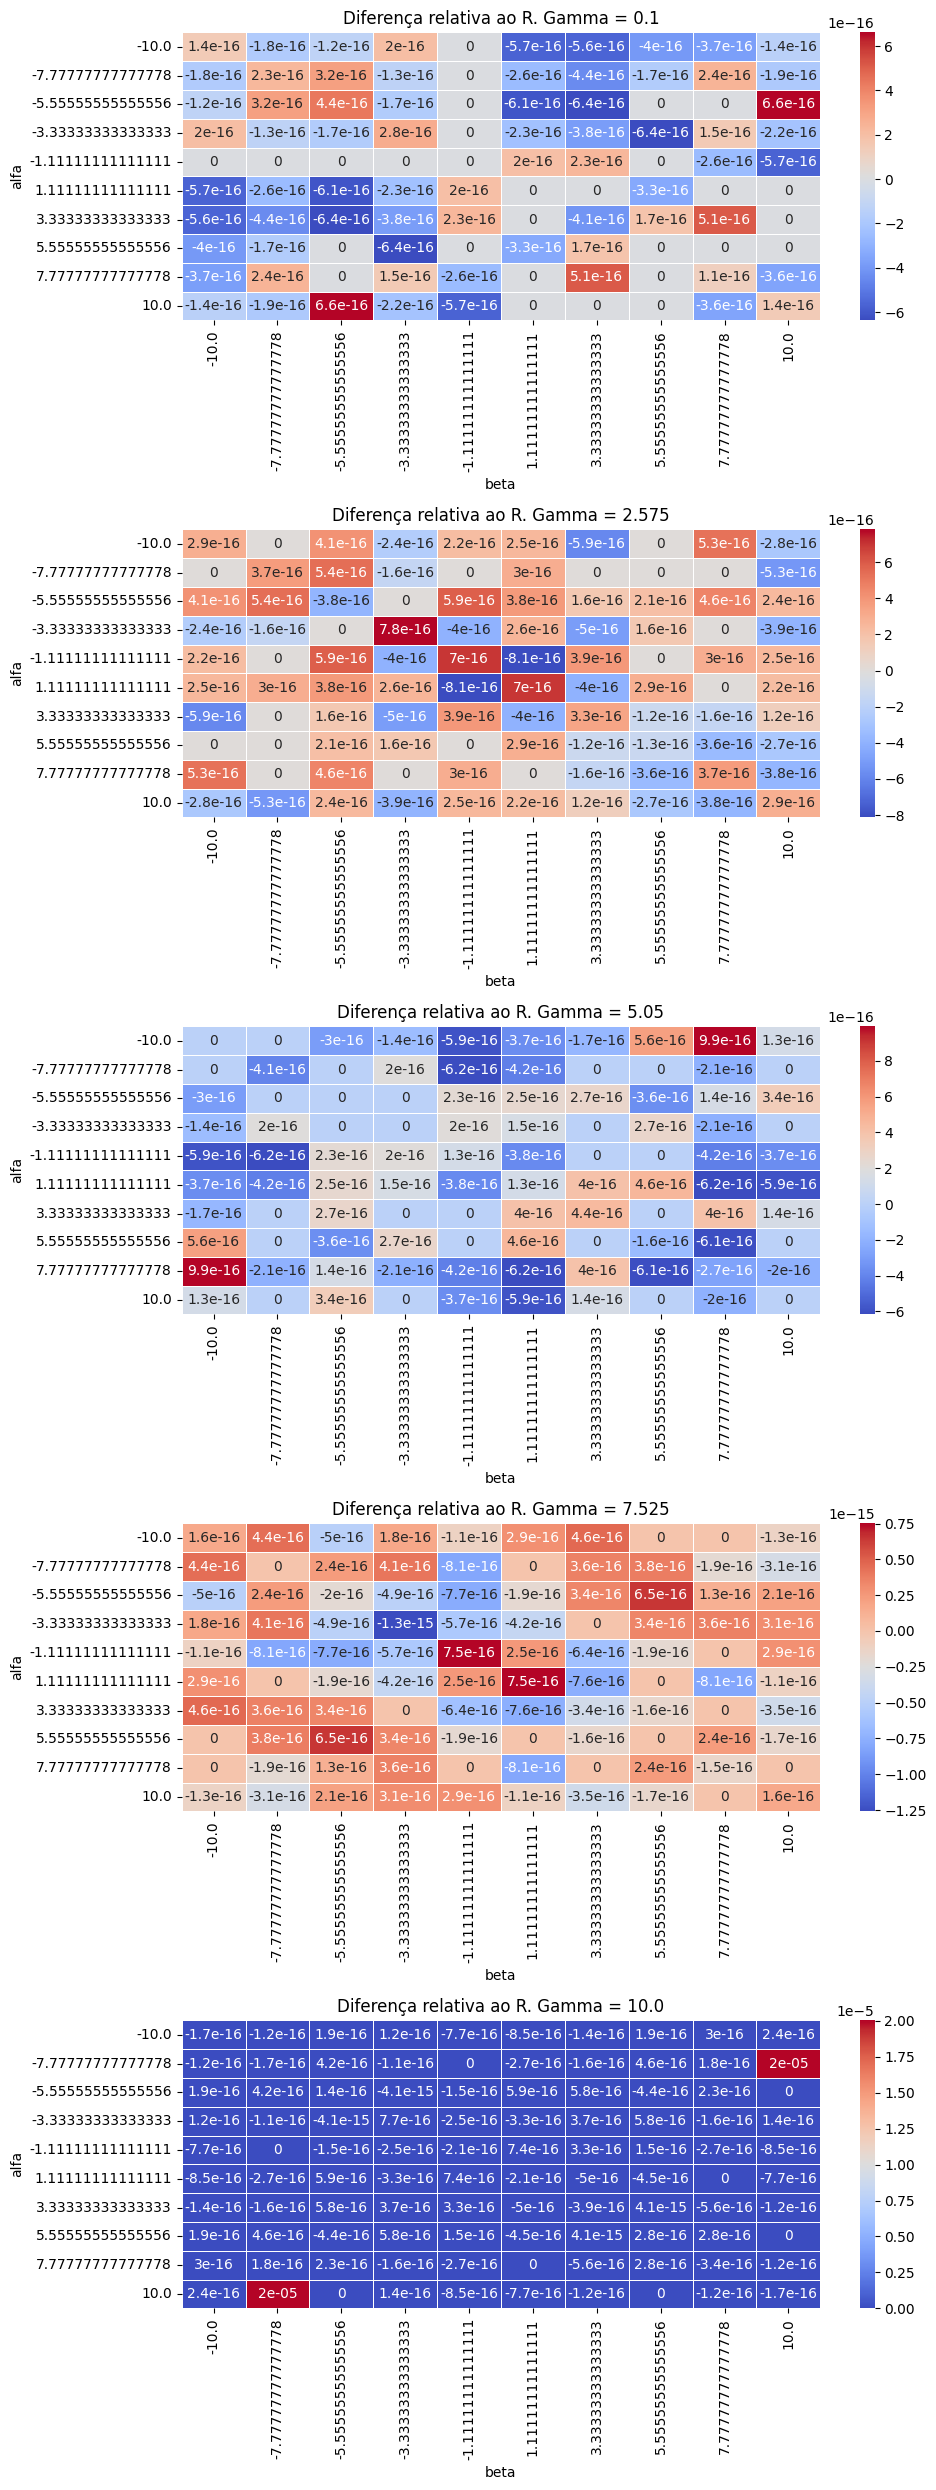

In [64]:
data['magnitude'] = data['R-STAN']/data['r']
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='R-STAN')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])


    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Diferença absoluta entre R e STAN. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
#fig.savefig('diff.png')

# Display the plot
plt.show()

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='magnitude')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])


    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Diferença relativa ao R. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
#fig.savefig('diff.png')

# Display the plot
plt.show()

/tmp/ipykernel_9100/3839253281.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['R-AS'][data['as'].isnull()] = np.nan
/tmp/ipykernel_9100/3839253281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

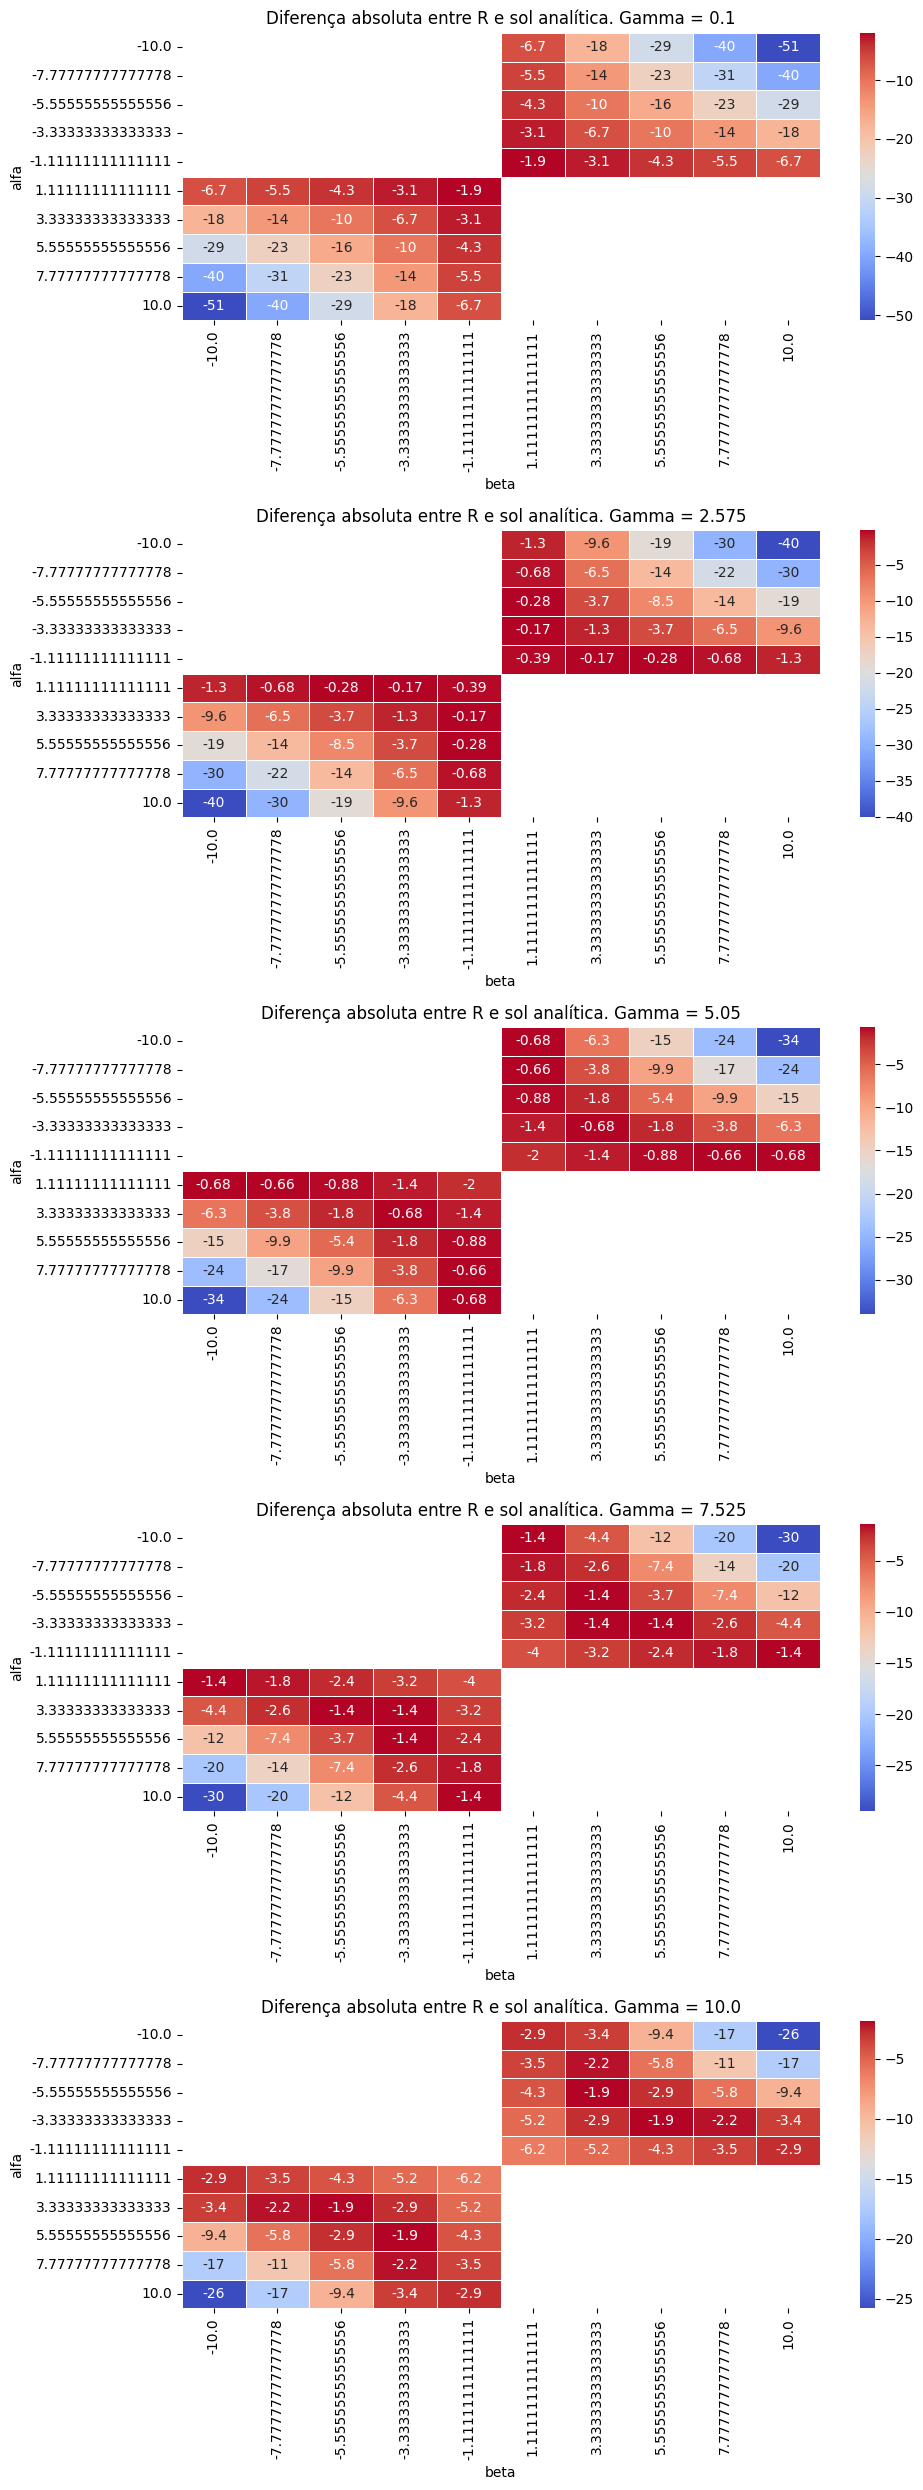

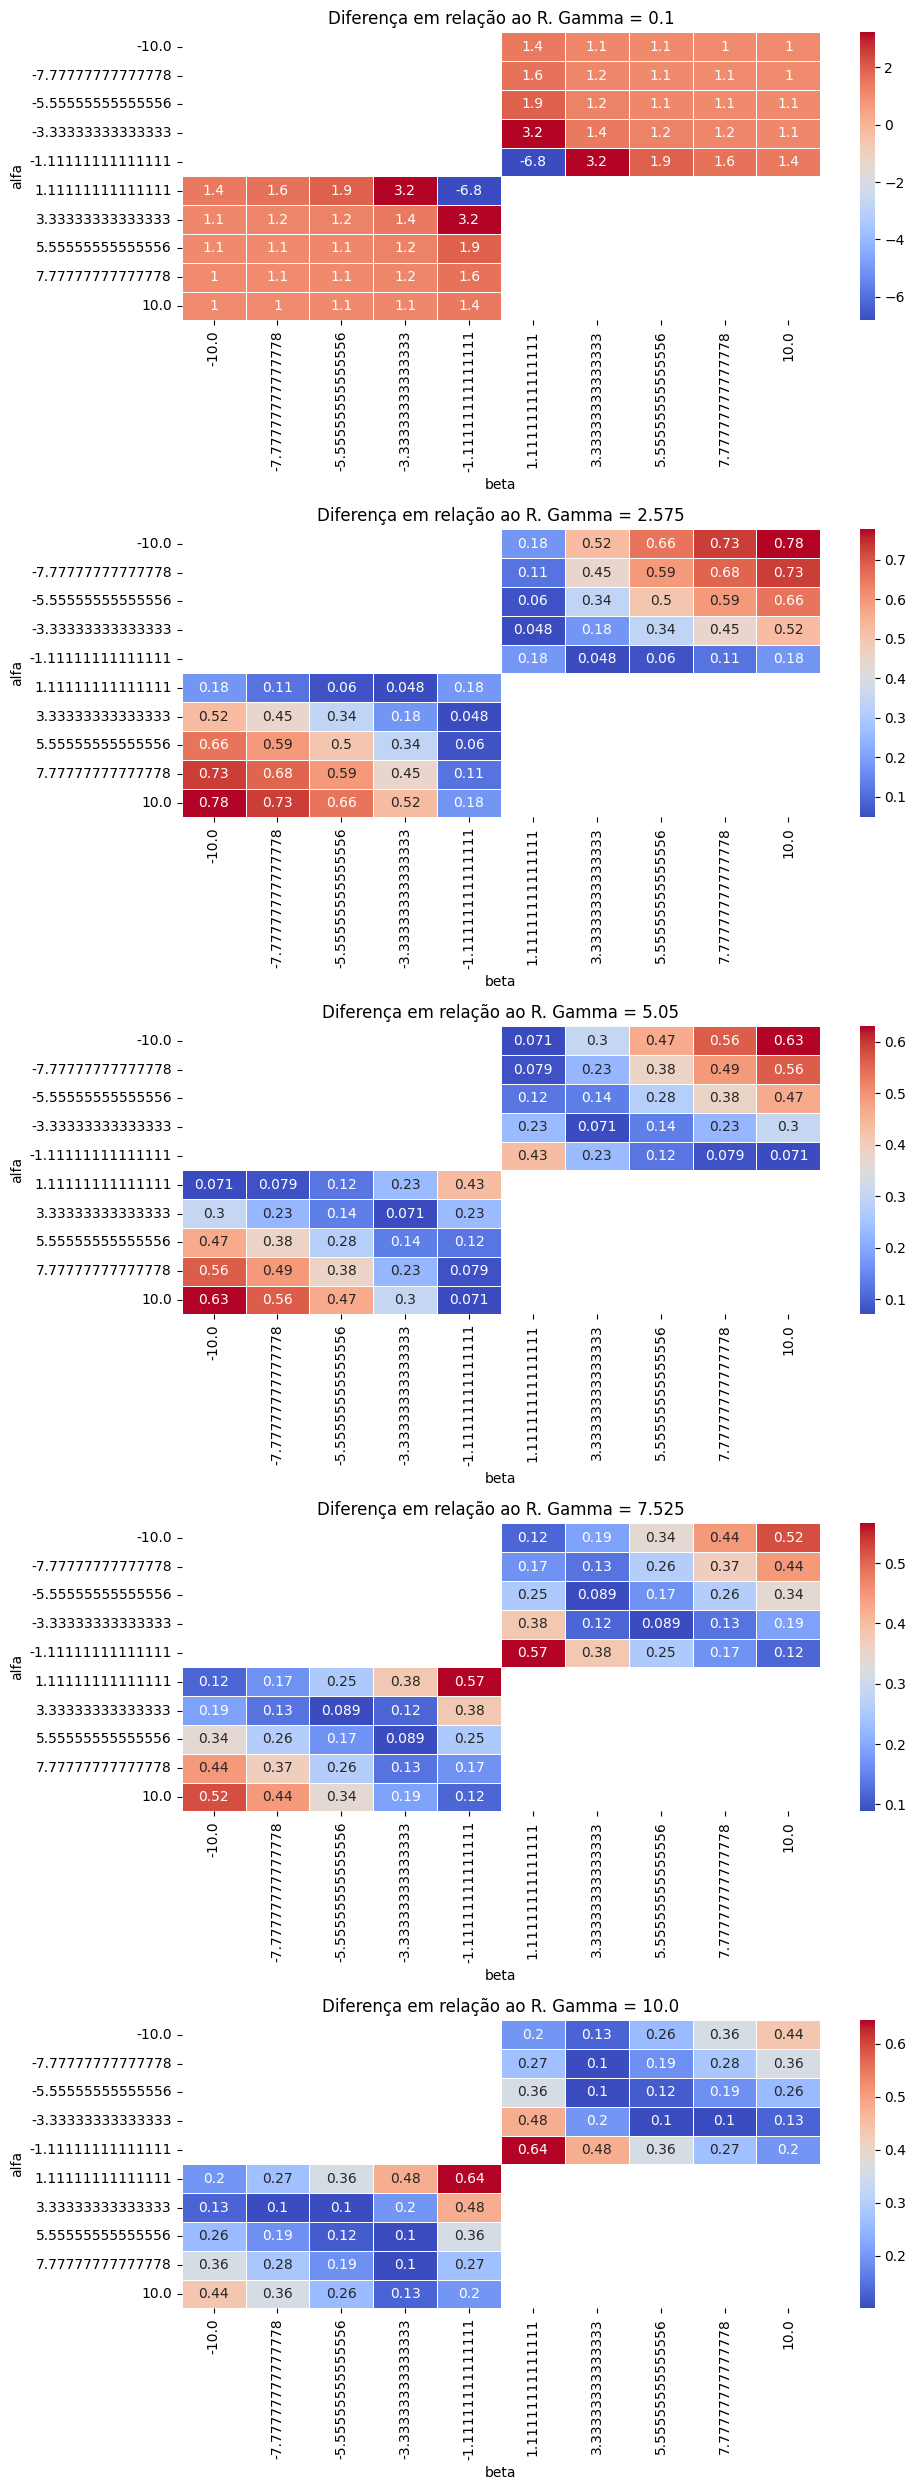

In [65]:
data['magnitude'] = data['R-AS']/data['r']
#print(data.head())
data['R-AS'][data['as'].isnull()] = np.nan
data['magnitude'][data['as'].isnull()] = np.nan

# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='R-AS')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Diferença absoluta entre R e sol analítica. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('diff.png')

# Display the plot
plt.show()

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='magnitude')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Diferença em relação ao R. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('magnitude.png')

# Display the plot
plt.show()

/tmp/ipykernel_9100/1226933314.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['STAN-AS'][data['as'].isnull()] = np.nan
/tmp/ipykernel_9100/1226933314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

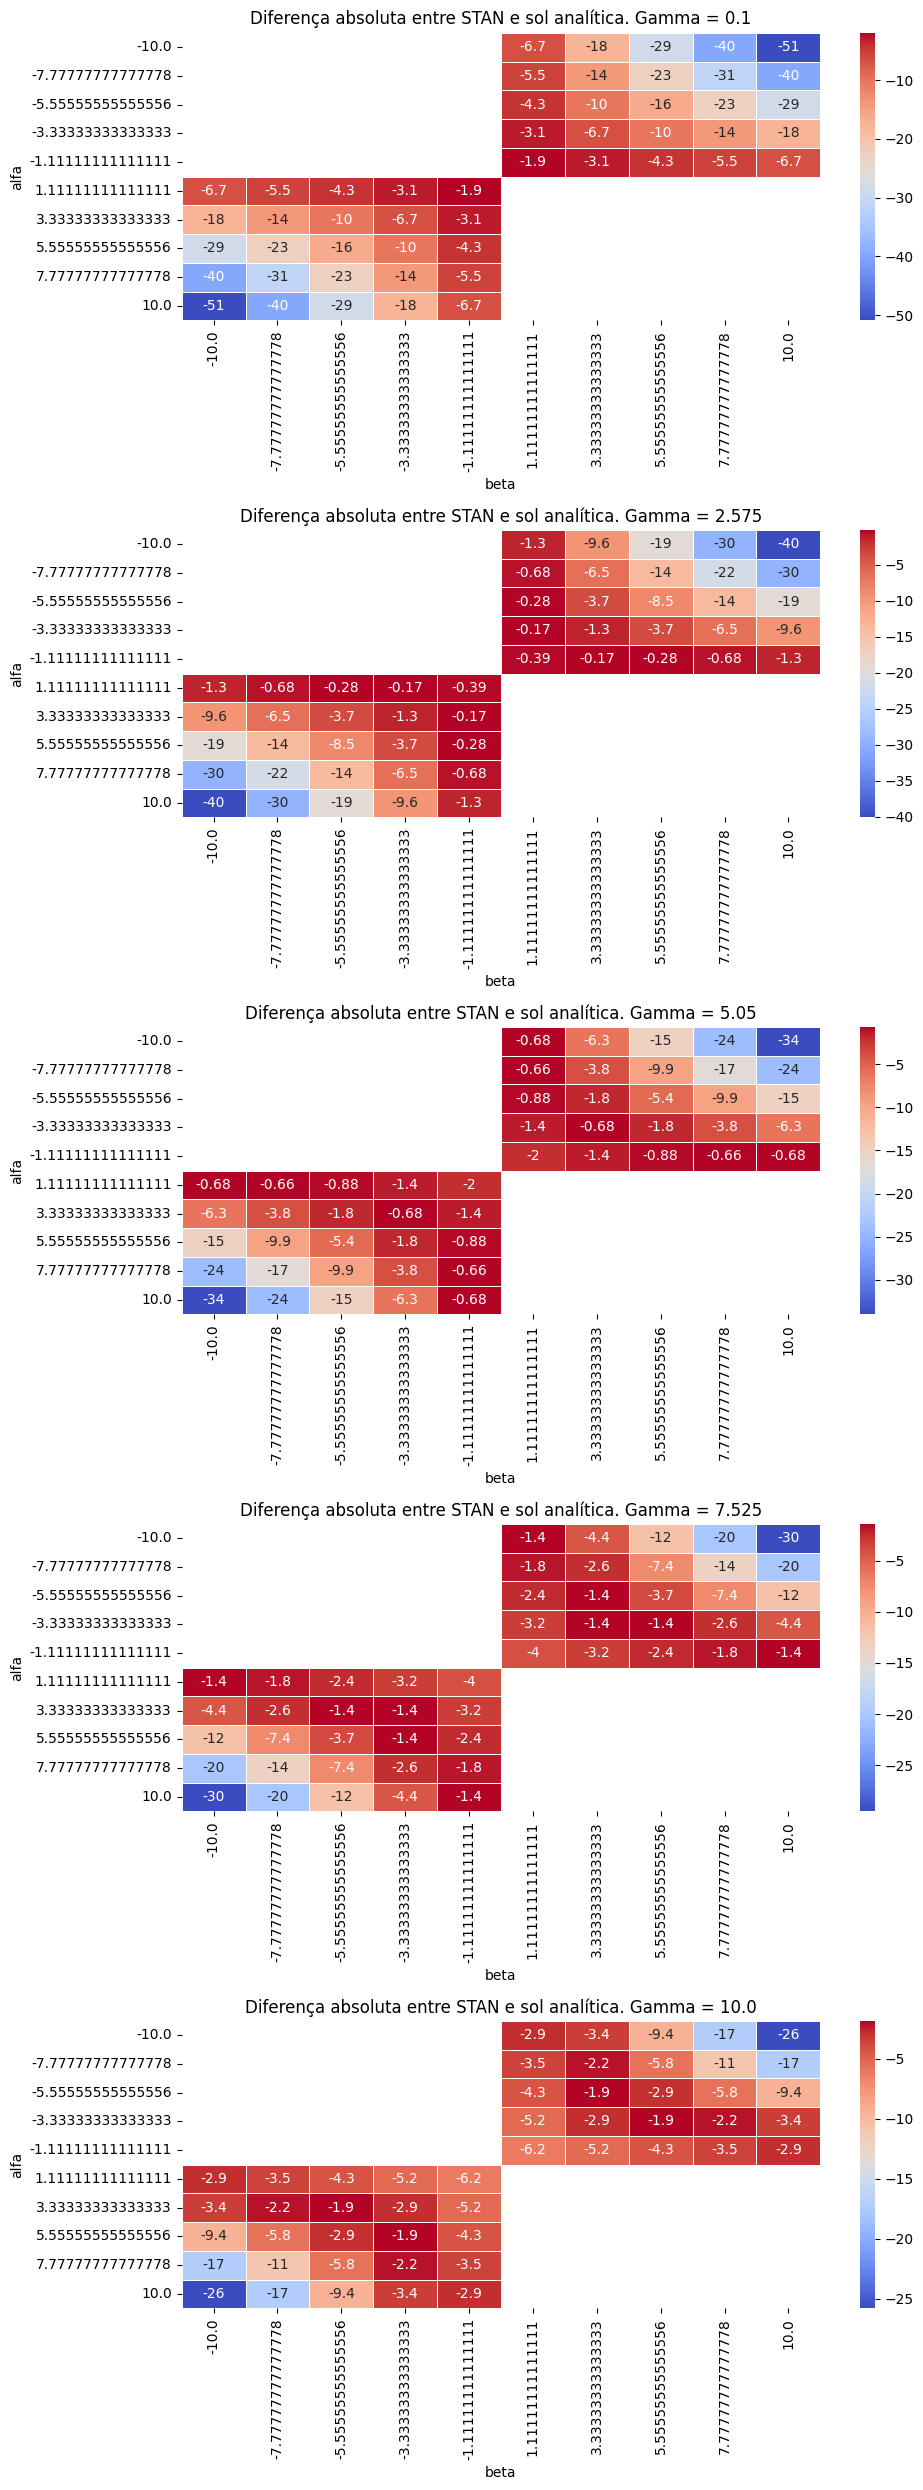

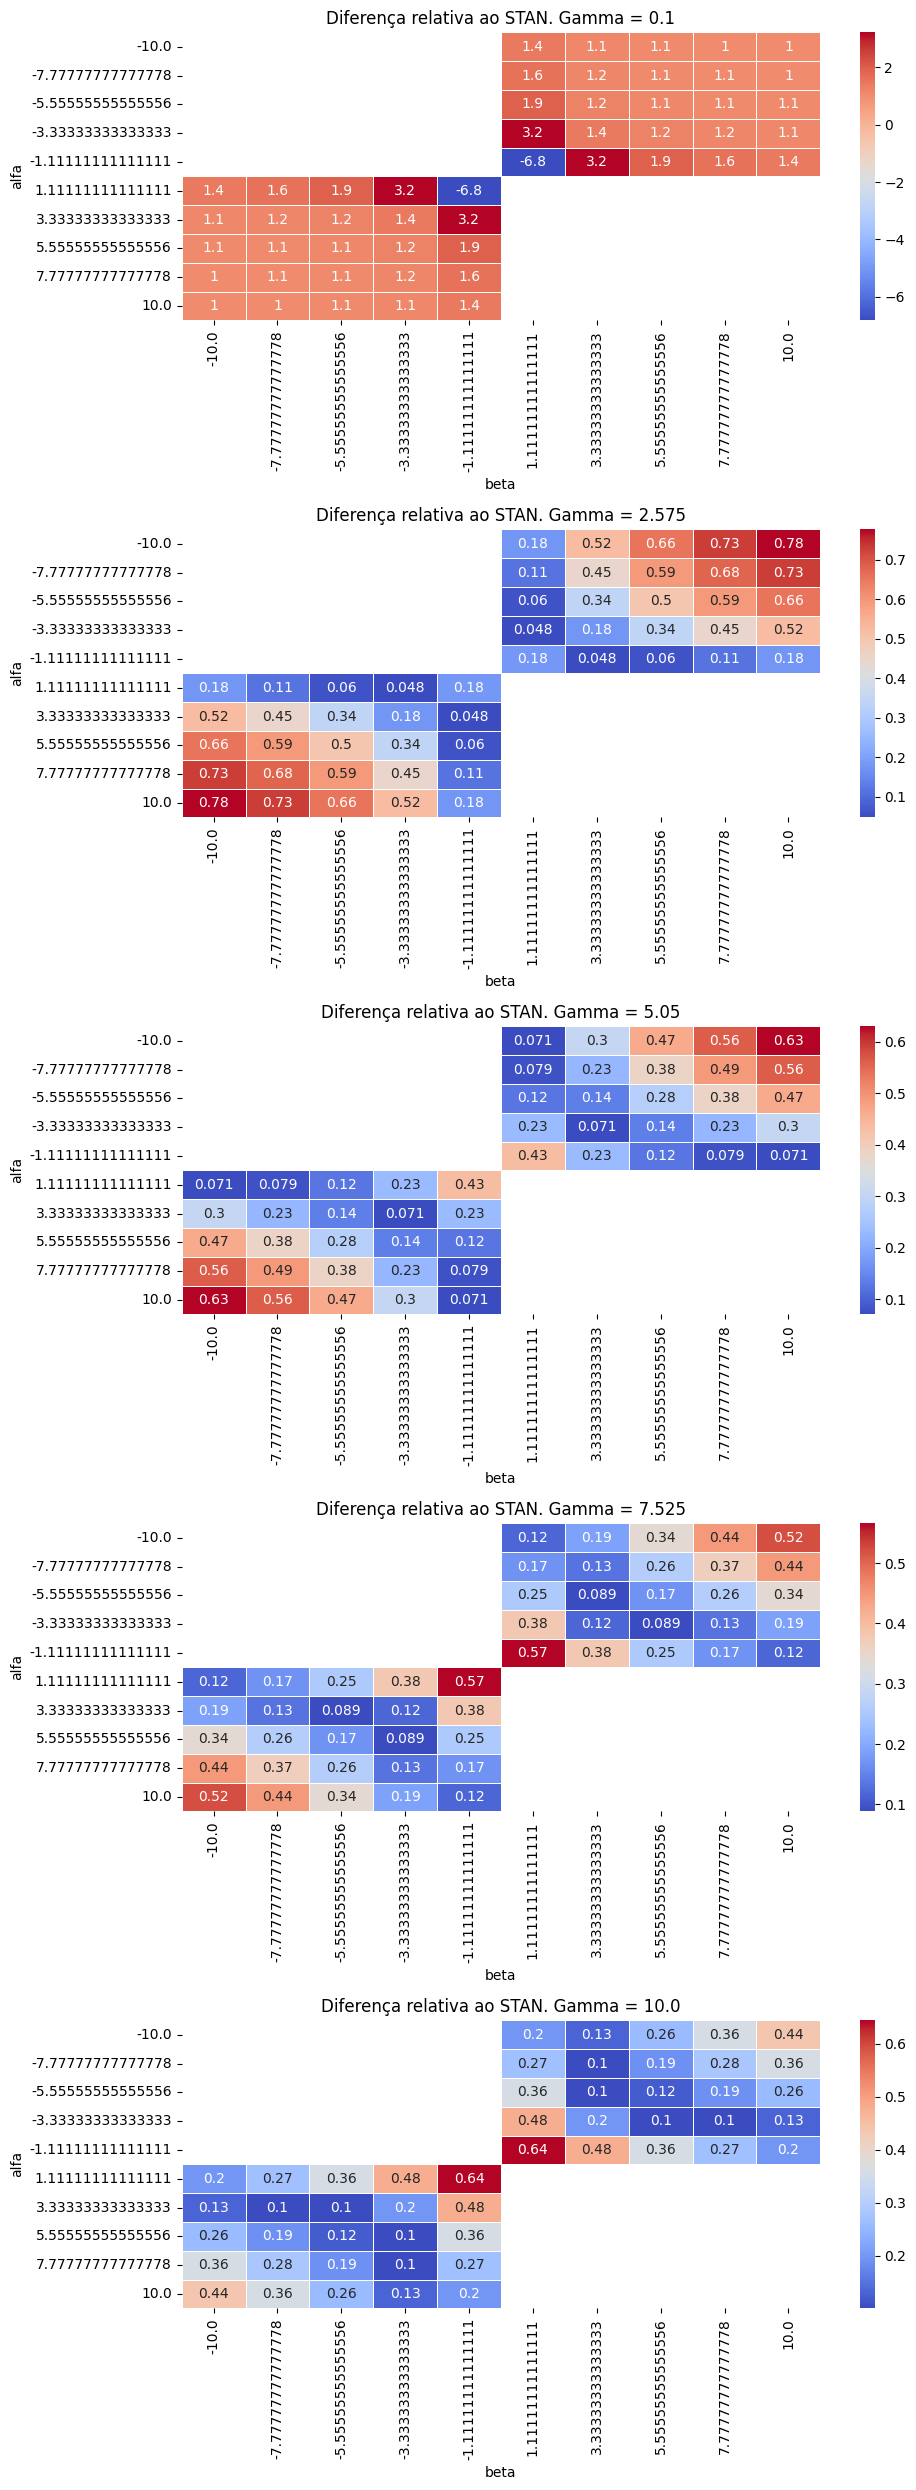

In [66]:
data['magnitude'] = data['STAN-AS']/data['stan']

data['STAN-AS'][data['as'].isnull()] = np.nan
data['magnitude'][data['as'].isnull()] = np.nan

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='STAN-AS')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Diferença absoluta entre STAN e sol analítica. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
#fig.savefig('magnitude_mod.png')

# Display the plot
plt.show()

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='magnitude')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Diferença relativa ao STAN. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
#fig.savefig('magnitude_mod.png')

# Display the plot
plt.show()

In [67]:
# Convert numbers to scientific notation
print(data['err'])

data['err_n'] = data['err'] / data['r']

0      5.680000e-14
1      5.380000e-14
2      5.100000e-14
3      4.830000e-14
4      4.550000e-14
           ...     
495    5.680000e-14
496    5.380000e-14
497    5.100000e-14
498    4.830000e-14
499    4.550000e-14
Name: err, Length: 500, dtype: float64


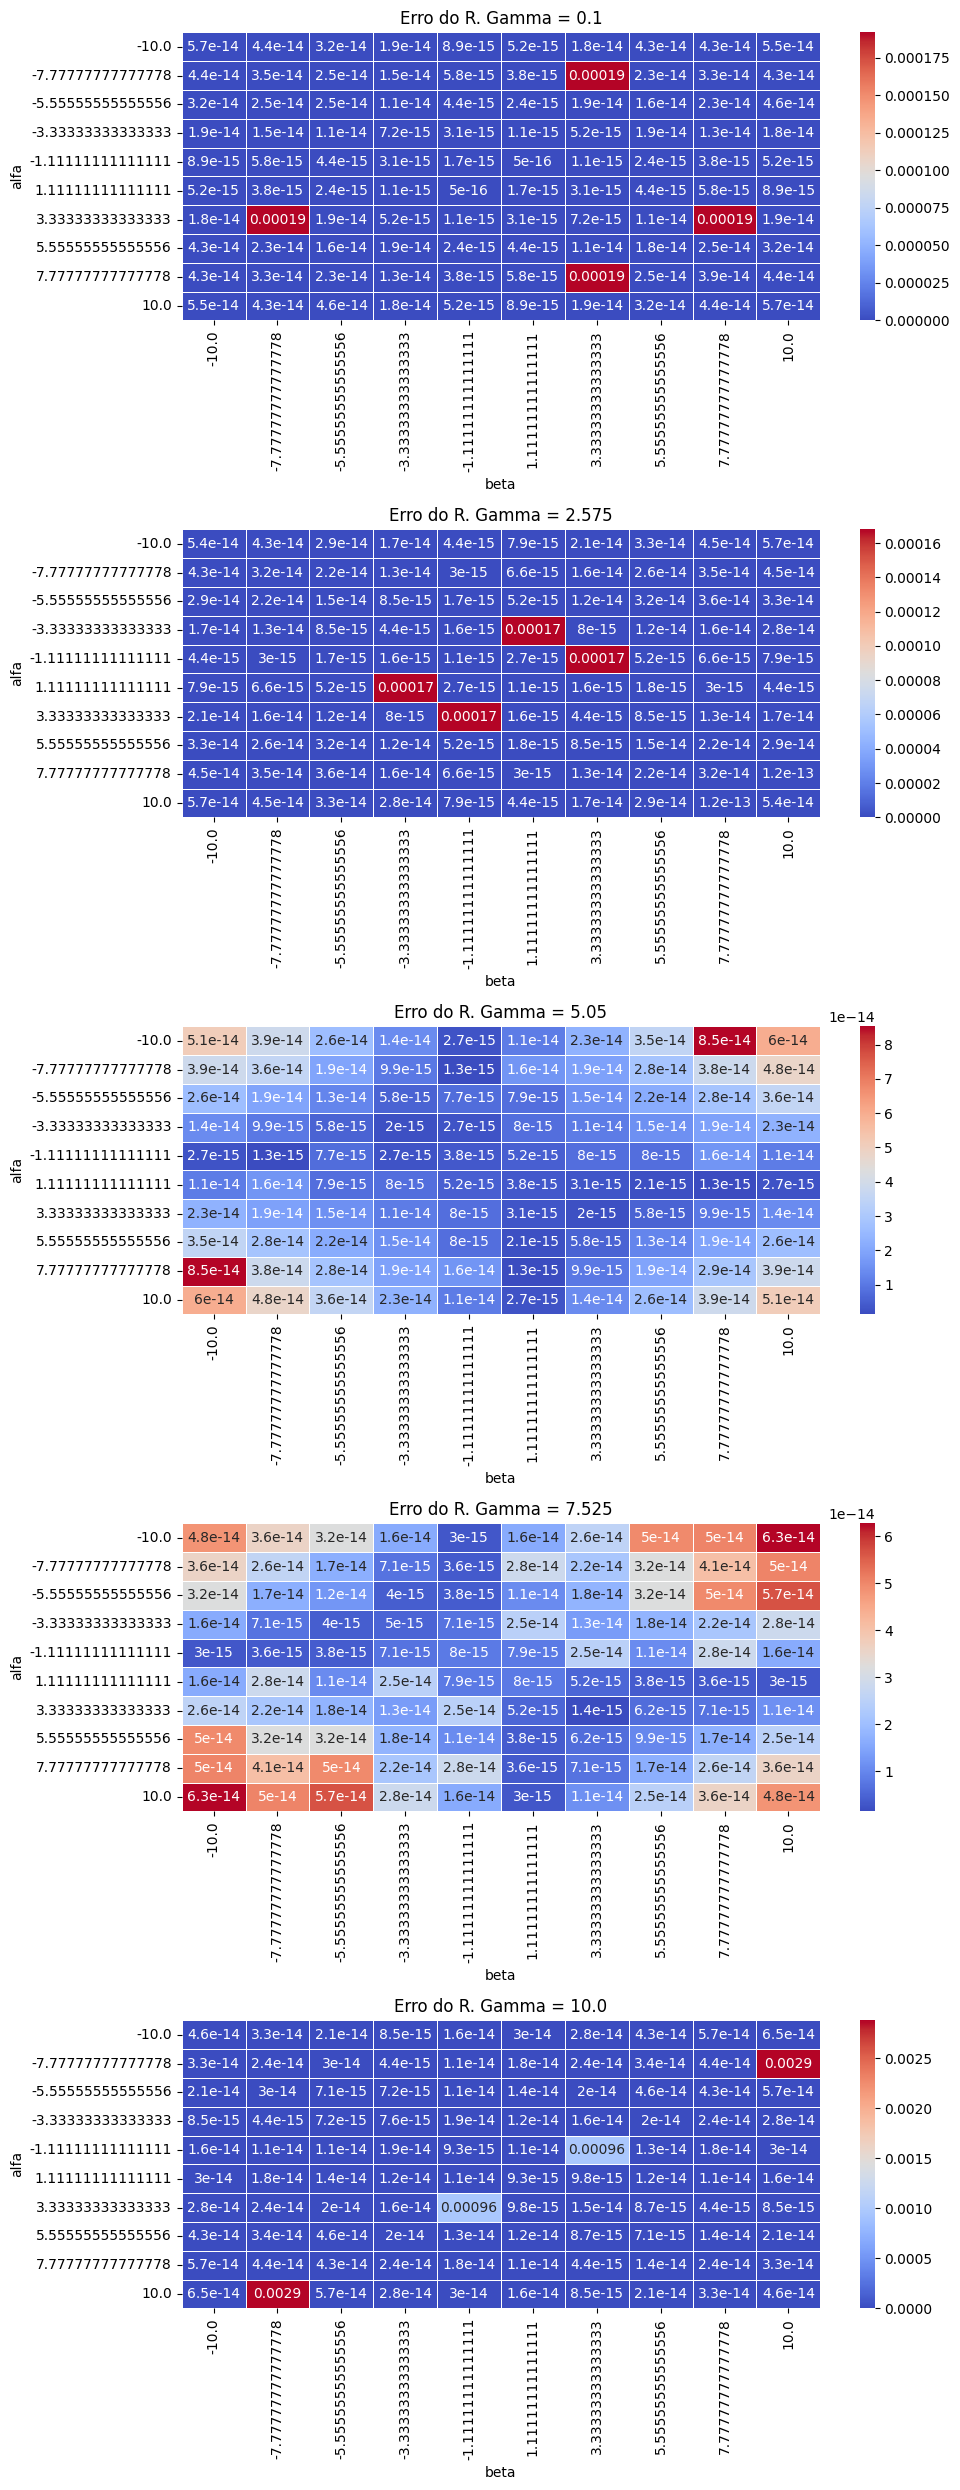

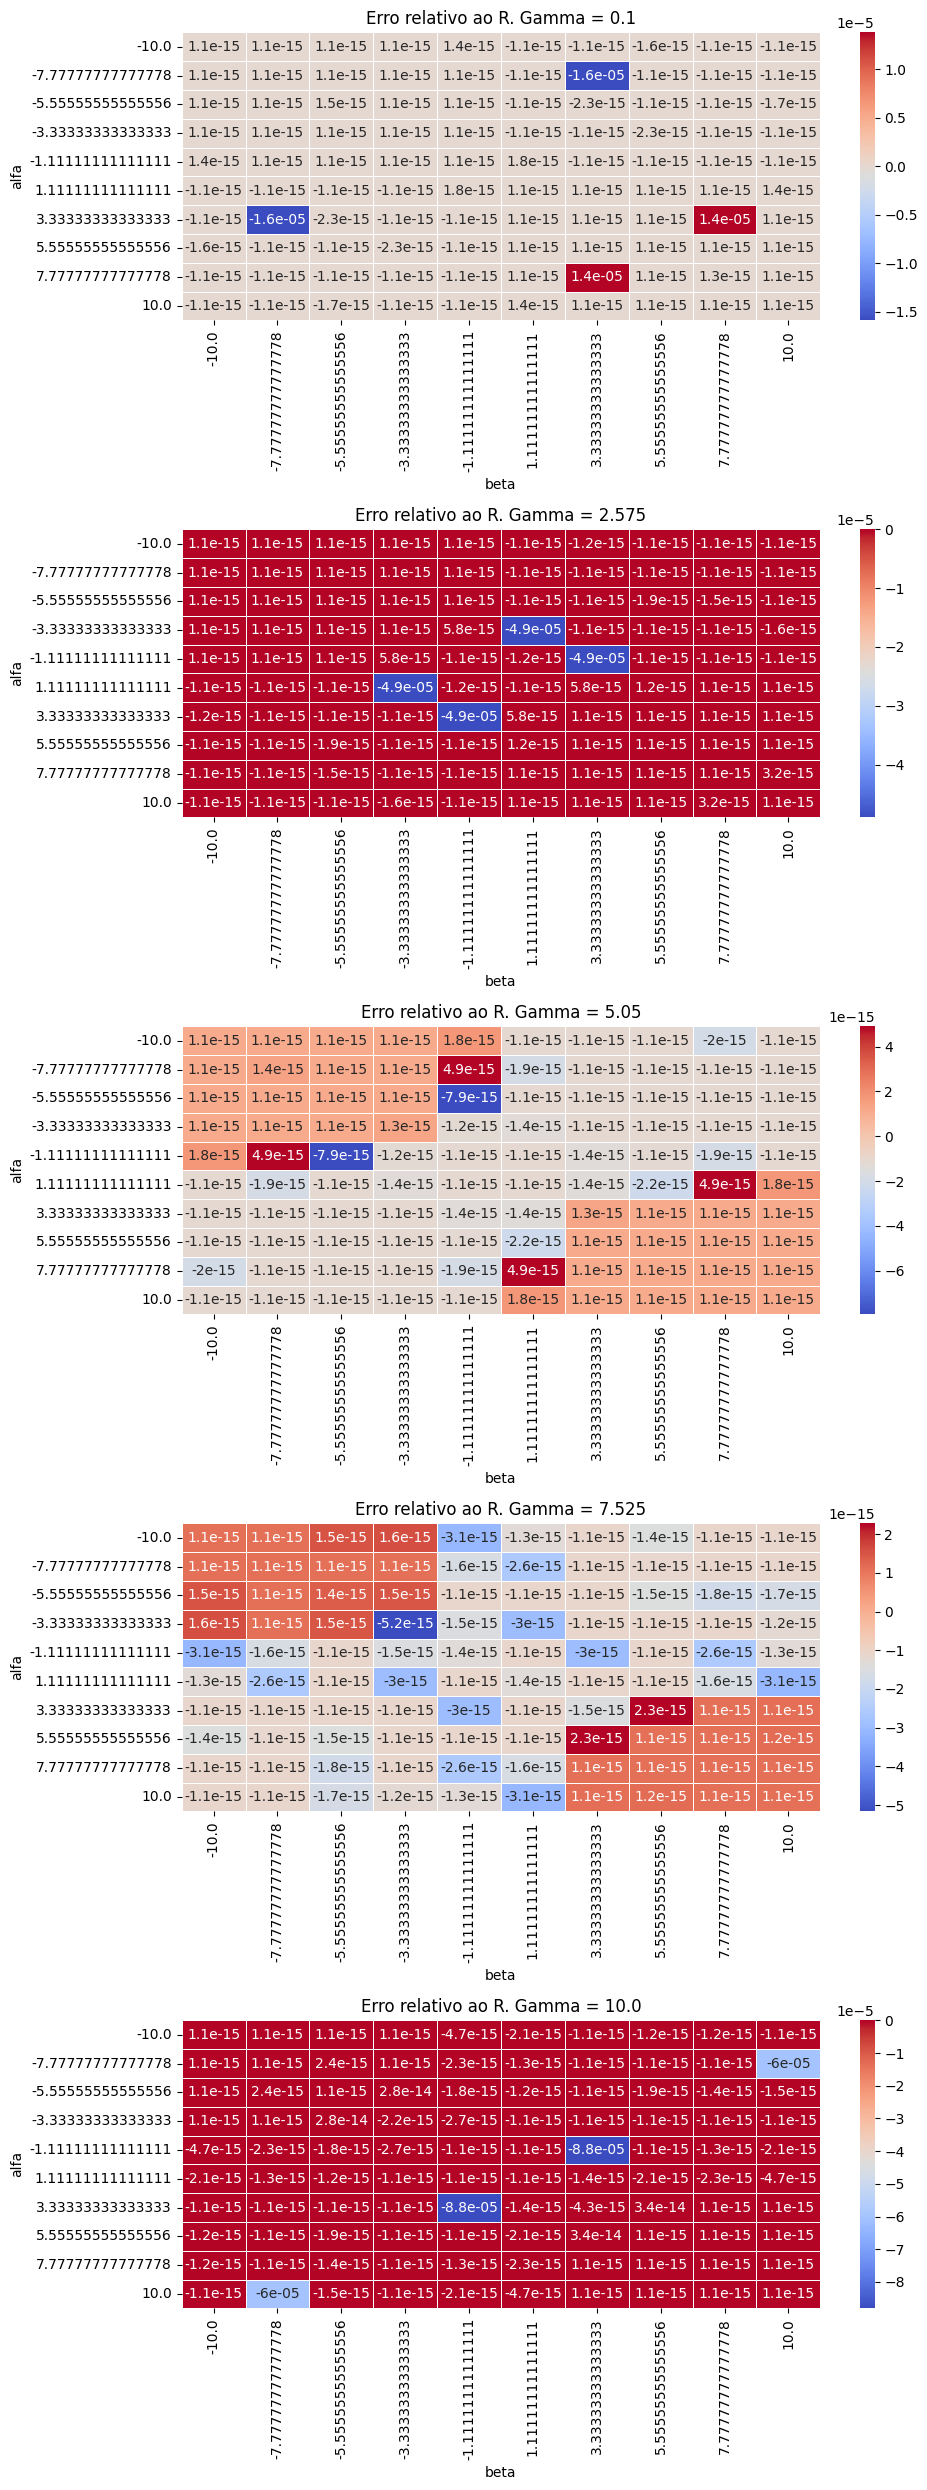

In [68]:
# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='err')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Erro do R. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('err_n.png')

# Display the plot
plt.show()

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='err_n')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])

    # Set the label for the colorbar
    cbar.set_label('r')

    # Set the title for the current subplot
    axes[i].set_title(f'Erro relativo ao R. Gamma = {gamma}')

    # Set the x-axis label for the current subplot
    axes[i].set_xlabel('beta')

    # Set the y-axis label for the current subplot
    axes[i].set_ylabel('alfa')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('err_n.png')

# Display the plot
plt.show()